In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



Using TensorFlow backend.


In [2]:
df=pd.read_csv('AAPL.csv')
#df=web.DataReader('APPL',data_source='yahoo',start='2019-10-01',end='2020-10-17')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
1,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
2,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400
3,2019-09-17,54.990002,55.205002,54.779999,55.174999,54.632942,73274800
4,2019-09-18,55.264999,55.712502,54.860001,55.692501,55.145359,101360000


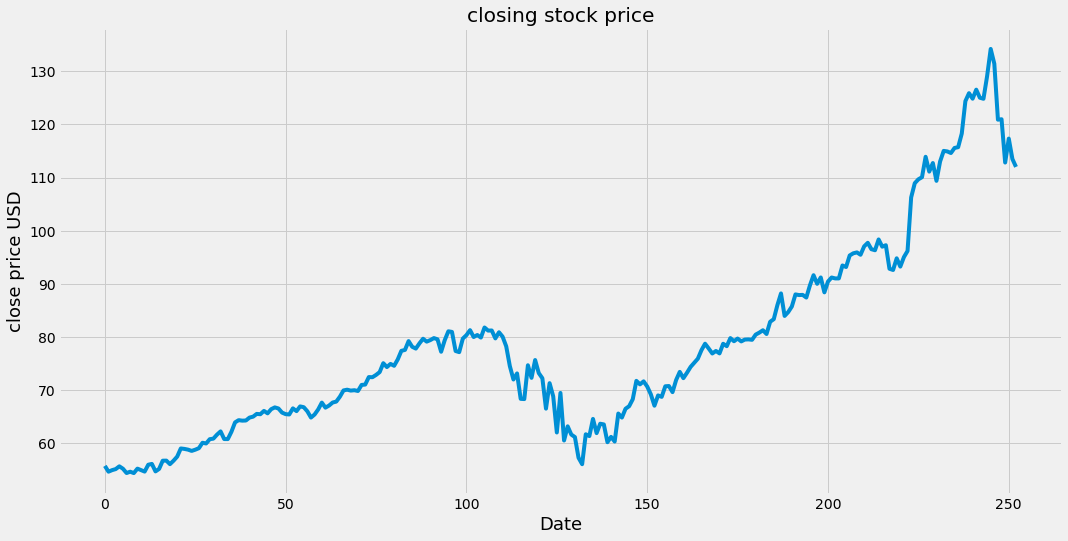

In [4]:
plt.figure(figsize=(16,8))
plt.title('closing stock price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD',fontsize=18)
plt.show()

In [5]:
#Tking only the value CLOSE stock value of the APPL data set with close data only we are trying to find the next day starting price trade
data=df.filter(['Close'])
#coverting the data set to numpy array to easy manipulation of the data
dataset=data.values
# now we are going to train the data 
training_data_len=math.ceil(len(dataset)*.8)#we are rounding off the value using math.ceil
training_data_len


203

In [6]:
#in this we are trying to convert the whole data between 0 to 1 range using of scaler in python some how we are going to get the result in between 0 to 1 any way
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.69571350e-02],
       [3.35383672e-03],
       [6.95837556e-03],
       [9.46591082e-03],
       [1.59541509e-02],
       [1.02808933e-02],
       [1.56732708e-04],
       [3.25980462e-03],
       [0.00000000e+00],
       [1.05002765e-02],
       [6.92705660e-03],
       [3.57327003e-03],
       [1.97154225e-02],
       [2.16587401e-02],
       [4.01208651e-03],
       [9.84207685e-03],
       [2.92439963e-02],
       [2.94007165e-02],
       [2.10631909e-02],
       [2.93066969e-02],
       [3.88979588e-02],
       [5.80805453e-02],
       [5.70148105e-02],
       [5.52909262e-02],
       [5.23132054e-02],
       [5.51655250e-02],
       [5.87074134e-02],
       [7.15584423e-02],
       [6.98345580e-02],
       [7.99272869e-02],
       [8.11810733e-02],
       [9.05842835e-02],
       [9.83262725e-02],
       [8.02720712e-02],
       [8.01780517e-02],
       [9.74172704e-02],
       [1.19546196e-01],
       [1.24811969e-01],
       [1.23652252e-01],
       [1.23996999e-01],


In [20]:
#creatin the training data set
train_data=scaled_data[0:training_data_len,:]
#split the training data into x_train and y_train
x_train=[]
y_train=[]
for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i<= 31:
        print(x_train)
        print(y_train)
      

[array([0.01695713, 0.00335384, 0.00695838, 0.00946591, 0.01595415,
       0.01028089, 0.00015673, 0.0032598 , 0.        , 0.01050028,
       0.00692706, 0.00357327, 0.01971542, 0.02165874, 0.00401209,
       0.00984208, 0.029244  , 0.02940072, 0.02106319, 0.0293067 ,
       0.03889796, 0.05808055, 0.05701481, 0.05529093, 0.05231321,
       0.05516553, 0.05870741, 0.07155844, 0.06983456, 0.07992729])]
[0.08118107329369817]
[array([0.01695713, 0.00335384, 0.00695838, 0.00946591, 0.01595415,
       0.01028089, 0.00015673, 0.0032598 , 0.        , 0.01050028,
       0.00692706, 0.00357327, 0.01971542, 0.02165874, 0.00401209,
       0.00984208, 0.029244  , 0.02940072, 0.02106319, 0.0293067 ,
       0.03889796, 0.05808055, 0.05701481, 0.05529093, 0.05231321,
       0.05516553, 0.05870741, 0.07155844, 0.06983456, 0.07992729]), array([0.00335384, 0.00695838, 0.00946591, 0.01595415, 0.01028089,
       0.00015673, 0.0032598 , 0.        , 0.01050028, 0.00692706,
       0.00357327, 0.01971542, 0.0

In [28]:
#trying to convert training data set to numpy
x_train, y_train=np.array(x_train),np.array(y_train)
x_train.shape


(173, 30, 1)

In [29]:
#we are reshaping the data two three dimensional model
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(173, 30, 1)

In [30]:
#buliding the model sequential with lstm it is like a neural network but the block of memory interconnected within the layers
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
#compiling the model
#Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)


Epoch 1/1
173/173 [==============================] - 4s 24ms/step - loss: 0.0037


In [32]:
#creating the testing data set
#creating the new array conatins scaled values from index 173  to 200
test_data=scaled_data[training_data_len-60:,:]

# creating the x_test,y_test sample data 
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-30:i,0])
    
    
    


In [33]:
#covert the test data into numpy array
x_test = np.array(x_test)
#reshaping the  testing data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [34]:
#get the model predicting the price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#get the root meansqured error
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse
#if we get the vakue greater than 4.5 it is good sign if we get the value upto 7 is perfect.

1.7816911443457044

C:\Users\ADMIN\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


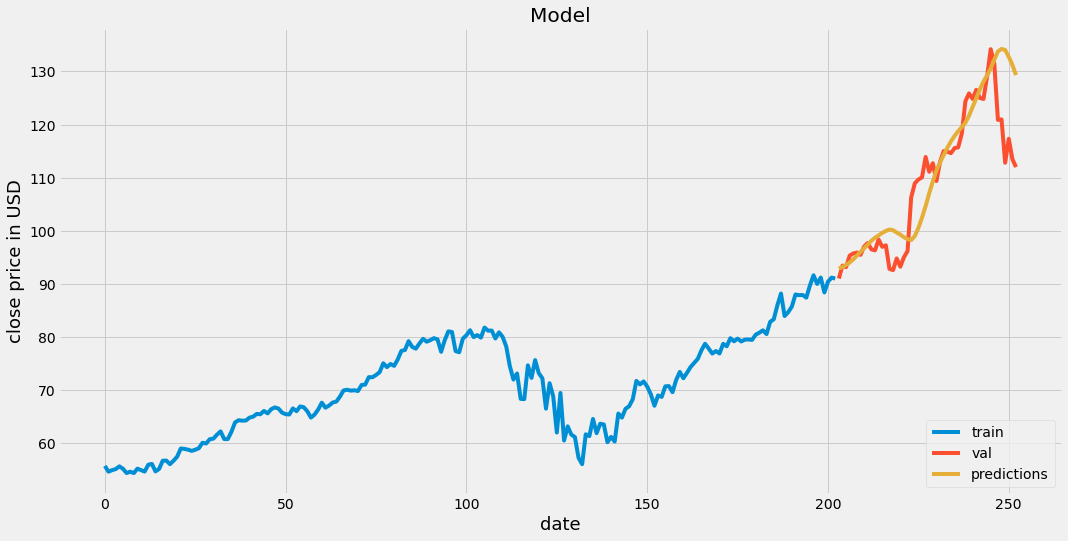

In [36]:
#plotting the trained data which we got 
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price in USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()
